In [1]:
%load_ext autoreload
%autoreload 2

import train
import evaluate

In [2]:
params = train.CNNParams(
    embed_size=100,
    dropout=0.5,
    epochs=200,
    filters=[(33, 3), (33, 5), (33, 7)],
    num_layers=1,
    max_norm=3,
)

char_params = train.CharCNNParams(
    dropout=0.5,
    epochs=200,
    max_norm=3,
)

word_results, char_results = evaluate.run(
    params,
    char_params,
    training_sizes=[200, 800, 1600, 2400],
    window_sizes=[(0, 1)],
    k=10,
    kmeans_path="../clustered_data/15",
    num_clusters=15,
    num_clusters_gmm=18,
    use_cluster_cnn=False,
)

Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.87it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

200 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.59it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

800 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:04<00:00,  4.35it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

1600 training samples, 1132 testing samples


Creating dictionary: 100%|██████████| 17/17 [00:03<00:00,  4.61it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

2400 training samples, 1132 testing samples


100%|██████████| 10/10 [38:53<00:00, 233.55s/it]


In [3]:
df_window1 = evaluate.results_to_dataframe(word_results, char_results)

In [4]:
#%store -r
%store df_window1

Stored 'df_window1' (DataFrame)


                                  score                    
                                   mean       std         p
size model    method   window                              
200  TokenCNN Baseline 1       0.910985  0.029030       NaN
              K-Means  1       0.899211  0.039458  0.245207
              GMM      1       0.899588  0.034649  0.264386
     CharCNN  Baseline 1       0.849166  0.042811       NaN
              K-Means  1       0.851820  0.028651  0.890824
              GMM      1       0.872446  0.018248  0.143936
800  TokenCNN Baseline 1       0.930235  0.016482       NaN
              K-Means  1       0.925037  0.017093  0.442063
              GMM      1       0.929045  0.009328  0.776924
     CharCNN  Baseline 1       0.896192  0.028554       NaN
              K-Means  1       0.909012  0.027009  0.337123
              GMM      1       0.917084  0.018062  0.055589
1600 TokenCNN Baseline 1       0.939916  0.015089       NaN
              K-Means  1       0.947653 

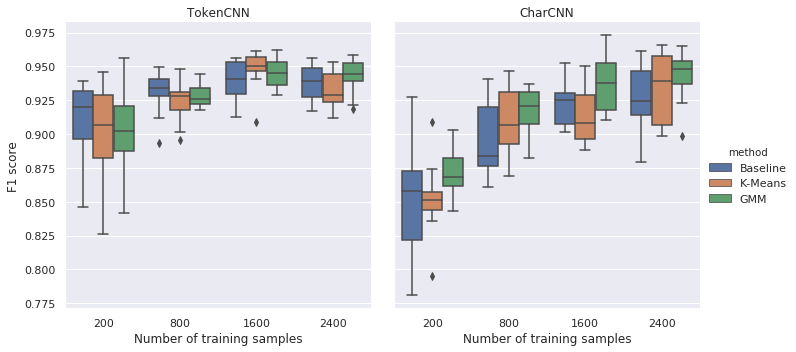

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

df = df_window1
def p(s):
    i = s.keys()[0]
    size = df.iloc[i]["size"]
    window = df.iloc[i]["window"]
    method = df.iloc[i]["method"]
    model = df.iloc[i]["model"]

    baseline_scores = df[(df["size"] == size) & (df["model"] == model) & (df["window"] == window) & (df["method"] == "Baseline")].score
    scores = s.tolist()
    return ttest_rel(baseline_scores, scores)[1]

evaluate.plot_sns(df)
print(df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]))

dir = "concat_window1"
os.makedirs(dir, exist_ok=True)
os.chdir(dir)

#try:
#    plt.savefig("plot.pdf")
#    df.groupby(["size", "model", "method", "window"], sort=False).aggregate([np.mean, np.std, p]).to_latex("table.tex")
#except e:
#    print(e)
#finally:
#    os.chdir("..")